In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ["WANDB_DISABLED"] = "true"

import sys
sys.path = [
    p for p in sys.path
    if p not in ['/home/jxm3/research/prompting/imodelsX', '/home/jxm3/research/prompting/tree-prompt']
]
sys.path.append('/home/jxm3/research/retrieval/inversion')

In [2]:
import analyze_utils

full_df = analyze_utils.load_results_from_folder("/home/jxm3/research/retrieval/inversion/results_evaluation")

In [3]:
df = full_df[(~full_df["dataset"].isna()) & (full_df["sequence_beam_width"] > 1)]

In [4]:
len(df[~df["dataset"].isna()]["dataset"].unique())

15

In [5]:
df.columns

Index(['eval_loss', 'eval_pred_num_tokens', 'eval_true_num_tokens',
       'eval_token_set_precision', 'eval_token_set_recall',
       'eval_token_set_f1', 'eval_bleu_score', 'eval_meteor_score',
       'eval_rouge_score', 'eval_exact_match', 'eval_emb_cos_sim',
       'eval_runtime', 'eval_samples_per_second', 'eval_steps_per_second',
       'alias', 'num_samples', 'return_best_hypothesis',
       'num_gen_recursive_steps', 'sequence_beam_width', 'beam_width',
       'eval_n_ngrams_match_1', 'eval_n_ngrams_match_2',
       'eval_n_ngrams_match_3', 'eval_num_true_words', 'eval_num_pred_words',
       'dataset'],
      dtype='object')

In [6]:
TABLE_COLUMNS = ["eval_true_num_tokens", "eval_pred_num_tokens", "eval_bleu_score", "eval_token_set_f1","eval_emb_cos_sim", "eval_exact_match"]
table_df = (
    df.sort_values(by="eval_exact_match", ascending=False)
        .groupby("dataset")
        .first()
    .sort_values(by="eval_true_num_tokens")[TABLE_COLUMNS]
)

table_df["eval_exact_match"] *= 100
table_df["eval_token_set_f1"]*= 100

print(table_df.to_latex(float_format="{:.2f}".format))

\begin{tabular}{lrrrrrr}
\toprule
 & eval_true_num_tokens & eval_pred_num_tokens & eval_bleu_score & eval_token_set_f1 & eval_emb_cos_sim & eval_exact_match \\
dataset &  &  &  &  &  &  \\
\midrule
quora & 15.53 & 18.64 & 73.32 & 93.46 & 0.99 & 66.00 \\
signal1m & 24.51 & 27.21 & 38.58 & 73.34 & 0.97 & 23.20 \\
msmarco & 72.07 & 73.82 & 36.48 & 71.52 & 0.98 & 5.60 \\
fever & 73.37 & 71.75 & 29.18 & 70.79 & 0.98 & 16.50 \\
dbpedia-entity & 93.13 & 92.56 & 28.34 & 65.03 & 0.98 & 4.00 \\
hotpotqa & 94.34 & 94.16 & 24.25 & 64.33 & 0.98 & 9.60 \\
nq & 95.52 & 93.89 & 20.27 & 60.56 & 0.97 & 4.00 \\
webis-touche2020 & 105.23 & 104.99 & 12.52 & 56.20 & 0.95 & 6.50 \\
cqadupstack & 106.31 & 106.05 & 11.12 & 51.64 & 0.94 & 1.40 \\
scidocs & 124.54 & 122.82 & 9.60 & 46.10 & 0.96 & 0.00 \\
trec-covid & 125.23 & 123.47 & 10.30 & 47.00 & 0.96 & 1.00 \\
scifact & 127.24 & 125.68 & 9.53 & 44.39 & 0.96 & 0.00 \\
nfcorpus & 127.34 & 125.80 & 14.09 & 50.57 & 0.97 & 0.00 \\
bioasq & 127.40 & 125.37 & 11.2

In [26]:
table_df.iloc[0].name

'quora'

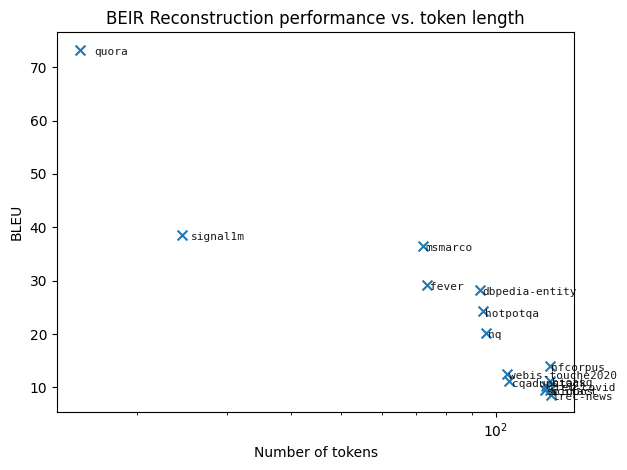

In [38]:
import matplotlib.pyplot as plt

xlabel = "eval_true_num_tokens"
ylabel = "eval_bleu_score"
ax = table_df.plot(x=xlabel, y=ylabel, kind="scatter", s=50, marker='x')


xpad = 1
ypad = -1
for i in range(len(table_df)):
        txt, y, x = (
            table_df.iloc[i].name,
            table_df.iloc[i][ylabel],
            table_df.iloc[i][xlabel],
        )
        ax.annotate(txt, (x + xpad, y + ypad), fontsize=8, weight="normal", alpha=0.9, family="monospace")

ax.set_xlabel("Number of tokens")
ax.set_ylabel("BLEU")
ax.set_xscale("log")

ax.set_title("BEIR Reconstruction performance vs. token length")

plt.tight_layout()
plt.savefig("reconstruction_vs_token_length.pdf", dpi=300)